# Netflix: analysis and visualization

   #### Netflix is a streaming service that offers a wide variety of award-winning TV shows, movies, anime, documentaries, and more on thousands of internet-connected devices. In this notebook, I will focus on data analysis and visualization.

**My goal is to answer the following questions:**

1. Which 10 countries have made the most films and TV shows?
2. Cheking percentage movies and TV shows from the total amount of content
3. Number of rating in each category 
4. Which 10 genre is most often found on the Netflix?
5. Visualize how many Movie and TV Show were shown each year
6. Duration TV Shows and Movies
7. Release month of TV Shows and Movies

In [7]:
#importing  neccesary library and  data 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import datetime as dt
from collections import Counter

#### First, we import all the necessary libraries, load the dataset and see what it contains

In [8]:
#importing dataset
df=pd.read_csv('netflix_titles.csv')

In [9]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [10]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

   ## Cleaning and editing data

#### Сheking missing values

In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### I will delete the cells where  a lot of missed values and which ones I don’t need in the future.
#### Where 4-3 values are missing-I will fill them 

In [12]:
df.drop(df[['show_id','director']], axis=1, inplace=True)

In [13]:
df[df['rating'].isna()]

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,TV Show,Gargantia on the Verdurous Planet,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,TV Show,Little Lunch,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,Movie,My Honor Was Loyalty,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [14]:
delete_nan = {
    5989: 'TV-PG',
    6827: 'TV-MA',
    7312: 'TV-Y',
    7537: 'TV-MA',
   
}

for id, rate in delete_nan.items():
    df.iloc[id, 6] = rate
    
df['rating'].isna().sum()

0

#### I took this information from the internet.

In [15]:
df[df['duration'].isna()]

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,Movie,Louis C.K. 2017,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [16]:
delete_nan = {
    5541: '74 min',
    5794: '84 min',
    5813: '66 min'
   
}

for id, minute in delete_nan.items():
    df.iloc[id, 7] = minute
    
df['duration'].isna().sum()

0

#### Here we can see  that there is an error in the dataframe, the value of the "Duration" column has shifted to the "Rating" column. Fix this moment

In [17]:
delete_nan2 = {
    5541: 'TV-MA',
    5794: 'TV-MA',
    5813: 'TV MA'
}
for id, rate in delete_nan2.items():
    df.iloc[id, 6] = rate


In [18]:
df.iloc[5541]

type                                                        Movie
title                                             Louis C.K. 2017
cast                                                   Louis C.K.
country                                             United States
date_added                                          April 4, 2017
release_year                                                 2017
rating                                                      TV-MA
duration                                                   74 min
listed_in                                                  Movies
description     Louis C.K. muses on religion, eternal love, gi...
Name: 5541, dtype: object

#### Changing datatype of date_added column to datetime

In [19]:
df["date_added"] = pd.to_datetime(df["date_added"])

#### 1. Which  10 countries have made the most films and TV shows?

In [43]:

top_10_country = df['country'].value_counts().reset_index(name='show_count')[:10]

In [44]:
top_10_country

,index,show_count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


Text(0.5, 1.0, 'top_10_country')

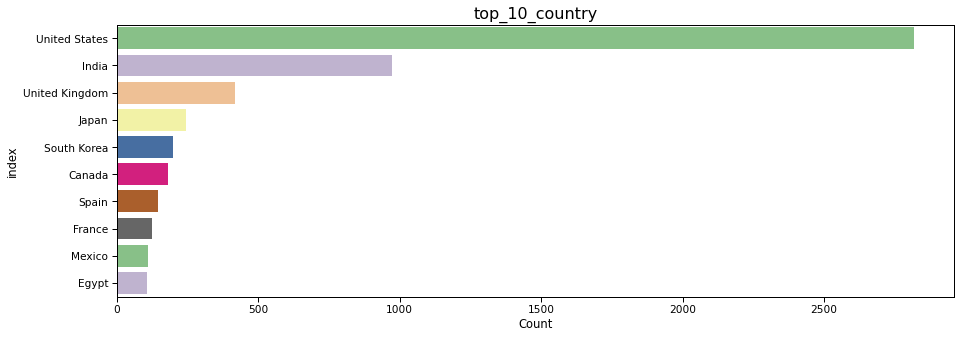

In [57]:
plt.figure(figsize=(15,5))
sns.barplot(x='show_count', y='index', data=top_10_country,palette = "Accent")
plt.xlabel('Count')
plt.title('top_10_country', fontsize=16)

#### 2.Cheking percentage movies and TV shows from the total amount of content

Text(0.5, 1.0, 'types_of_show')

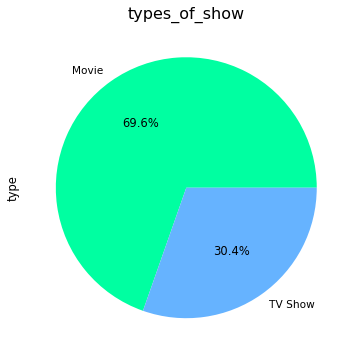

In [58]:
df["type"].value_counts().plot(kind = "pie", autopct = "%1.1f%%",figsize=(6,6),colors=['#00ffa1','#66b3ff'])
plt.title('types_of_show', fontsize=16)

#### 3.Number of rating in each category

Text(0.5, 1.0, 'rating')

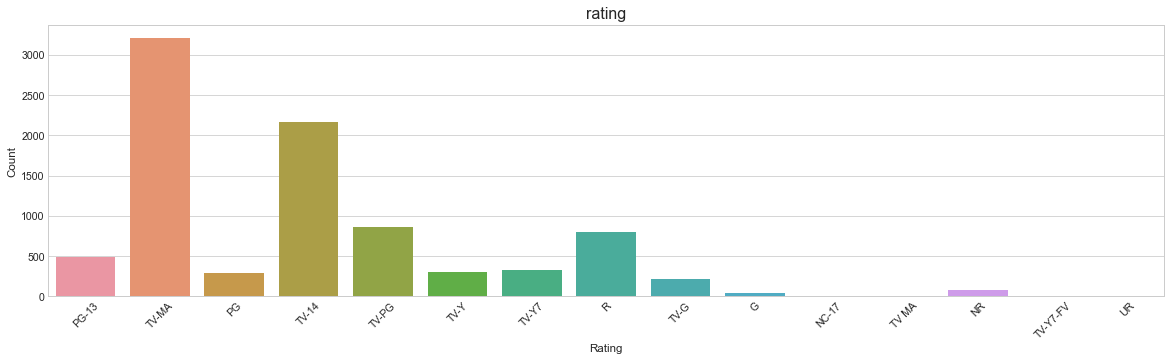

In [59]:
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'rating', data = df)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title('rating', fontsize=16)

#### 4.Which 10 genre is most often found on the Netflix?

In [60]:
show_genre= df.groupby(['listed_in','type'])[ 'type'].count().reset_index(name='genre_count')
show_genre

,listed_in,type,genre_count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
509,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
510,"TV Horror, Teen TV Shows",TV Show,2
511,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
512,TV Shows,TV Show,16


In [61]:
top_10_genre=show_genre.sort_values('genre_count',ascending=False).head(10)
top_10_genre

,listed_in,type,genre_count
326,"Dramas, International Movies",Movie,362
274,Documentaries,Movie,359
470,Stand-Up Comedy,Movie,334
200,"Comedies, Dramas, International Movies",Movie,274
319,"Dramas, Independent Movies, International Movies",Movie,252
422,Kids' TV,TV Show,220
121,Children & Family Movies,Movie,215
125,"Children & Family Movies, Comedies",Movie,201
281,"Documentaries, International Movies",Movie,186
329,"Dramas, International Movies, Romantic Movies",Movie,180


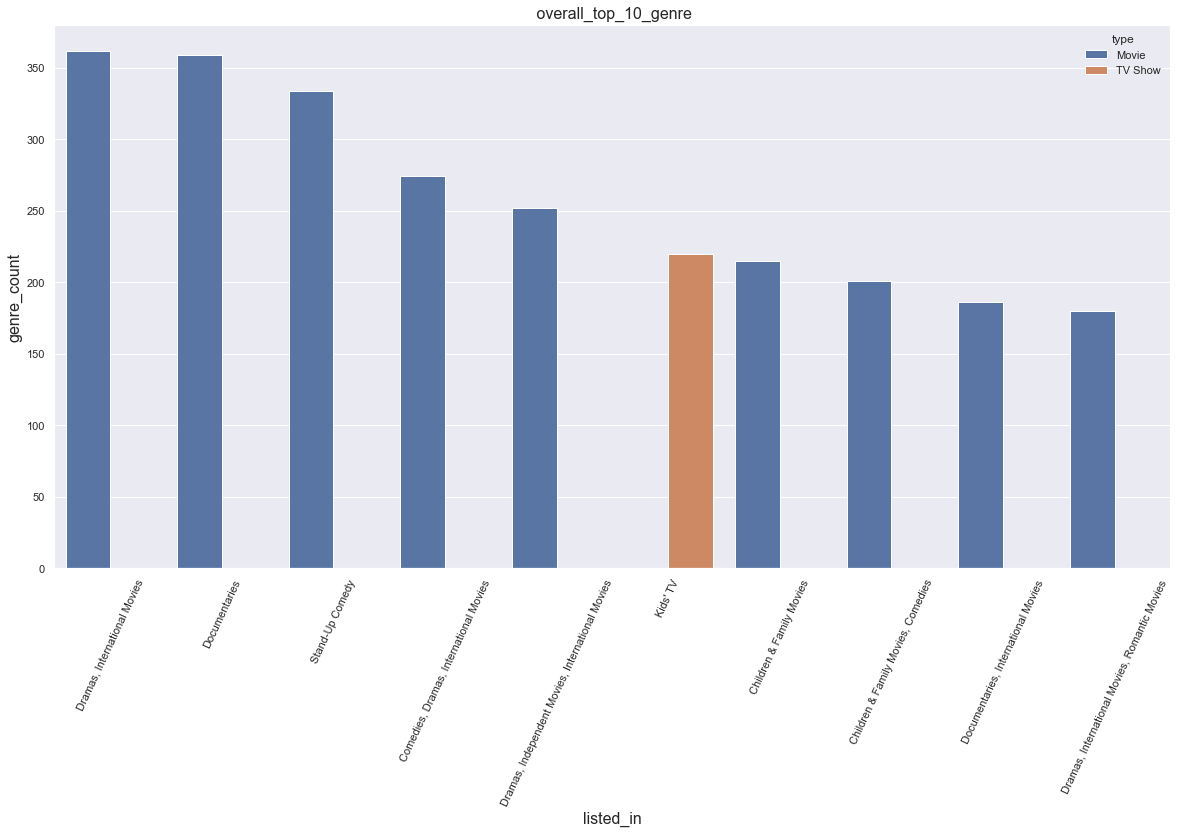

In [63]:
sns.barplot(x =top_10_genre.reset_index()['listed_in'], y=top_10_genre.reset_index()['genre_count'],
            hue =  top_10_genre.reset_index()['type']);
plt.title(' overall_top_10_genre', fontsize=16)
plt.xlabel('listed_in', fontsize=16);
plt.ylabel('genre_count', fontsize=16);
sns.set(rc = {'figure.figsize':(20,10)})
plt.xticks(rotation = 65)
sns.set(rc = {'figure.figsize':(12,6)})

#### Add a column with month and year

In [64]:
df['month'] = df['date_added'].dt.month_name()


In [65]:
df['year'] = df['date_added'].dt.year


#### Visualize how many Movie and TV Show were shown each year

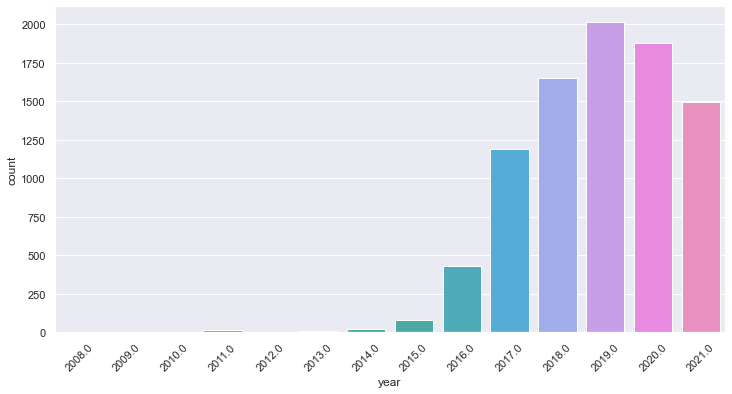

In [67]:
plt.xticks(rotation=45)
sns.countplot(x=df['year'])
plt.show()
sns.set(rc = {'figure.figsize':(12,6)})

#### Duration TV Shows and Movies

In [68]:
duration_counts= df.query("type=='TV Show'").groupby(['duration','type'])[ 'type'].count().reset_index(name='duration_counts')
duration_counts.sort_values('duration_counts', ascending=False).head(10)

,duration,type,duration_counts
0,1 Season,TV Show,1793
7,2 Seasons,TV Show,425
8,3 Seasons,TV Show,199
9,4 Seasons,TV Show,95
10,5 Seasons,TV Show,65
11,6 Seasons,TV Show,33
12,7 Seasons,TV Show,23
13,8 Seasons,TV Show,17
14,9 Seasons,TV Show,9
1,10 Seasons,TV Show,7


In [69]:
duration_counts2= df.query("type=='Movie'").groupby(['duration','type'])[ 'type'].count().reset_index(name='duration_counts')
duration_counts2.sort_values('duration_counts', ascending=False).head(10)

,duration,type,duration_counts
195,90 min,Movie,152
198,93 min,Movie,146
199,94 min,Movie,146
202,97 min,Movie,146
196,91 min,Movie,144
200,95 min,Movie,137
201,96 min,Movie,130
197,92 min,Movie,129
3,102 min,Movie,122
203,98 min,Movie,120


In [77]:
df['no_month'] = df['date_added'].dt.month

#### Release month of TV Shows and Movies

In [82]:
release_month= df.groupby(['month','no_month','type'])[ 'type'].count().reset_index(name='release_month').sort_values(by= ['no_month'])
release_month

,month,no_month,type,release_month
8,January,1.0,Movie,546
9,January,1.0,TV Show,192
6,February,2.0,Movie,382
7,February,2.0,TV Show,181
15,March,3.0,TV Show,213
14,March,3.0,Movie,529
0,April,4.0,Movie,550
1,April,4.0,TV Show,214
17,May,5.0,TV Show,193
16,May,5.0,Movie,439


[Text(0.5, 0, 'month'),
 Text(0, 0.5, 'release_count'),
 Text(0.5, 1.0, 'release_per_month')]

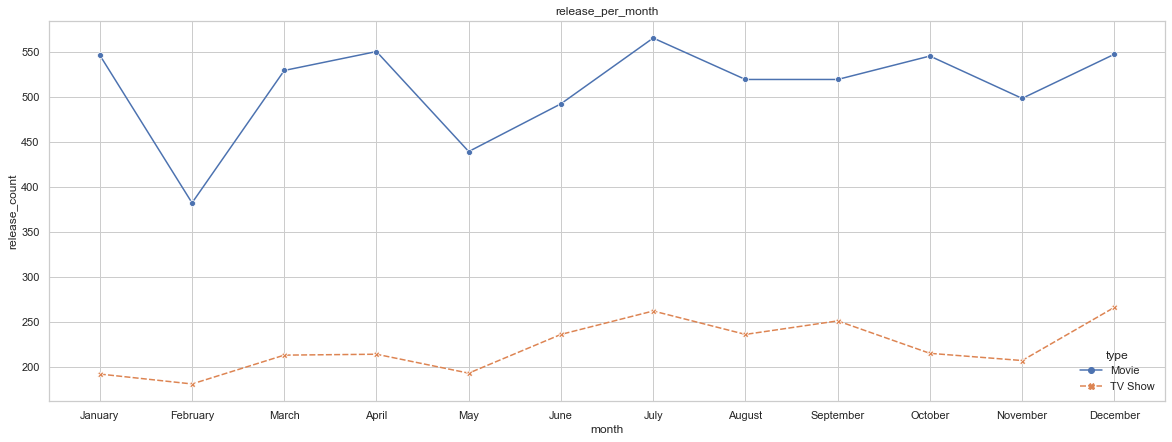

In [83]:
plt.figure(figsize=(20,7))
sns.set_style("whitegrid")
gfg = sns.lineplot(x ="month", y ="release_month", hue="type" ,style="type", markers=True, data = release_month,sizes=10)
gfg.set(xlabel ="month", ylabel = "release_count", title ='release_per_month')